# Regression with regularization

#### We will using the Boston Housing Dataset available in sklearn and we will extend it with  5 additional features of random noise to test each algorithm’s ability to filter out irrelevant information:

- **Examine the results of applying Linear Regression, Lasso Regression, Ridge Regression and Elastic Net on the features scores**
- **Try to modify the hyperparameters lambda and describe how it affects the parmeter scores**

### Import libraries and dataset from sklearn

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import mean_squared_error

boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Add Noise to original dataset

In [9]:
n_houses = boston_df.shape[0]
rand_noise = np.random.rand(n_houses, 5)

rand_noise_df = pd.DataFrame(data=rand_noise, columns=['Noise_1', 'Noise_2', 'Noise_3', 'Noise_4', 'Noise_5'])
X = pd.concat([boston_df, rand_noise_df], axis=1)
y = boston['target']

In [3]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Noise_1,Noise_2,Noise_3,Noise_4,Noise_5
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0.809766,0.522803,0.997917,0.815389,0.061931
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,0.044438,0.773088,0.865941,0.101728,0.458515
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0.878161,0.020066,0.879816,0.871388,0.650038
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,0.123388,0.306903,0.843426,0.433808,0.777775
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0.715747,0.836072,0.092277,0.925617,0.318339


In [4]:
y[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

### Implement classical linear regression, Lasso, Ridge and ElasticNet (use the default parameter of sklearn) and describe how the scores of the features change

### Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

model = LinearRegression()
model.fit(X, y)
y_pred_linear = model.predict(X)


In [13]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

r2 = r2_score(y, y_pred_linear)
rmse = np.sqrt(mse(y, y_pred_linear)) 
print(f'R2 for this prediction: {round(r2,2)}')
print(f'RMSE for this prediction: {round(rmse,2)}')

R2 for this prediction: 0.74
RMSE for this prediction: 4.68


### Lasso

In [41]:
lasso = Lasso()
lasso.fit(X, y)
y_pred_lasso = lasso.predict(X)

In [42]:
r2 = r2_score(y, y_pred_lasso)
rmse = np.sqrt(mse(y, y_pred_lasso)) 
print(f'R2 for this prediction: {round(r2,2)}')
print(f'RMSE for this prediction: {round(rmse,2)}')

R2 for this prediction: 0.68
RMSE for this prediction: 5.18


### Ridge

In [43]:
ridge = Ridge()
ridge.fit(X,y)
y_pred_ridge = ridge.predict(X)

In [44]:
r2 = r2_score(y, y_pred_ridge)
rmse = np.sqrt(mse(y, y_pred_ridge)) 
print(f'R2 for this prediction: {round(r2,2)}')
print(f'RMSE for this prediction: {round(rmse,2)}')

R2 for this prediction: 0.74
RMSE for this prediction: 4.69


### Elastic Net

In [45]:
elastic = ElasticNet()
elastic.fit(X,y)
y_pred_elastic = elastic.predict(X)

In [46]:
r2 = r2_score(y, y_pred_elastic)
rmse = np.sqrt(mse(y, y_pred_elastic)) 
print(f'R2 for this prediction: {round(r2,2)}')
print(f'RMSE for this prediction: {round(rmse,2)}')

R2 for this prediction: 0.69
RMSE for this prediction: 5.15


##### NORMALIZE DATA USING THE ```StandardScaler``` PROVIDED BY sklearn

In [47]:
from sklearn.preprocessing import StandardScaler

boston_ss = StandardScaler()
X_scaled = boston_ss.fit_transform(X=X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=235)

In [50]:
columns = X.columns.to_list()[::-1]
lin_cof = model.coef_[::-1]

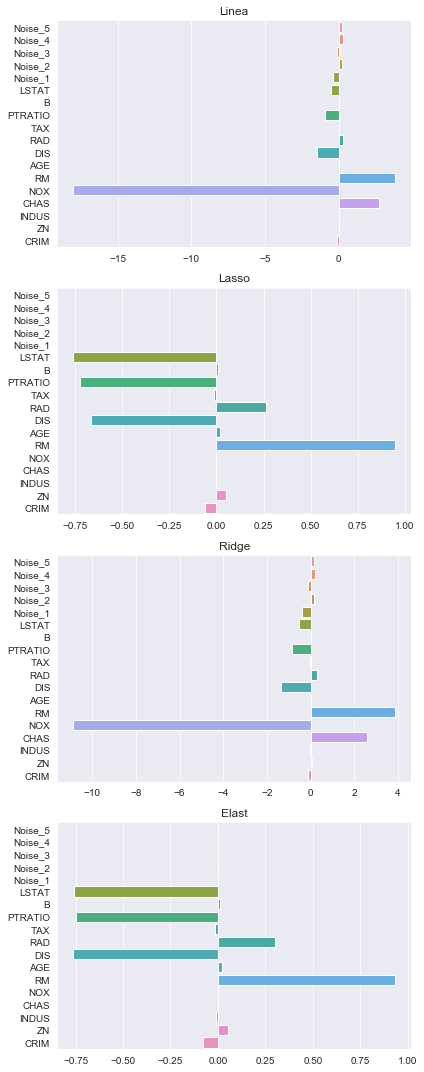

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
columns = X.columns.to_list()[::-1]
models = [model, lasso, ridge, elastic]
fig, ax = plt.subplots(4, figsize=(6,15))
for i, j in zip(range(4), models):
        sns.barplot(x=j.coef_[::-1], y=columns, ax=ax[i]).set_title(str(j)[:5])
plt.tight_layout()

#### Decribe the results

- We can see that linear regression assigned non-zero values to all 5 of our noise features, despite none of them having any predictive power. Interestingly, these noise features have coefficients with magnitudes similar to some of the real features in the dataset.
- As we hoped, Lasso did a good job of reducing all 5 of our noise features to 0, as well as many of the real features from the dataset. This is indeed a much simpler model than given by linear regression
- Ridge Regression makes a similar mistake that unregularized linear regression, assigning coefficient values to our noise features. We also see some features have very small coefficients.
- Much like Lasso, Elastic Net makes the coefficients of several features 0. It however does not make as many coefficients 0 as Lasso does.

### Compute the Model Scores

In [8]:
#THIS IS SHOWN ABOVE AT EACH REGULARIZATION (RMSE)

# PUT YOUR CODE HERE

Mean Squared Error of Linear Regression: 23.91
Mean Squared Error of Lasso: 24.91
Mean Squared Error of Ridge Regression: 23.91
Mean Squared Error of Elastic Net: 24.63


This might seem counter-intuitive, but it is important to remember the ridge regression model traded some variance for bias, which ultimately lead to an overall smaller error. The Lasso and Elastic Net models traded a significant amount of variance for bias, and we see that our error has increased.
Interestingly, Lasso and Elastic Net had a higher MSE than Linear Regression. But does that mean that these models are unequivocally worse? I would argue not, as the Lasso and Elastic Net models also performed feature selection, which gives us better interpretability of the models. Coefficients are interpreted as the change in dependent variable with a one unit increase in predictor value, with all other predictors held constant. In the case of complex models, the assumption of holding all other predictors constant cannot reasonably be met.

### Alpha parameter:  Apply Lasso with different values of alpha and describe how the parameters scores change


- Complete the function and apply it to the following values: [0, .0001, .5, 10]
- Describe the results

In [52]:
names = X.columns

# Create a function called lasso,
def lasso(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()
    
    # Create a column of feature names
    df['Feature Name'] = names
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,

        # ********************************************************
        lasso = Lasso(alpha=alpha) #********************************************************
        # ********************************************************
        
        # Fit the lasso regression
        lasso.fit(X_scaled, y)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = lasso.coef_
        
    # Return the dataframe  
    return df

In [53]:
lasso([0, .0001, .5, 10])

/Users/jorgesalazar/anaconda3/envs/cda/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/Users/jorgesalazar/anaconda3/envs/cda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/jorgesalazar/anaconda3/envs/cda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5532.303047513744, tolerance: 4.2716295415019765
  positive)


,Feature Name,Alpha = 0.000000,Alpha = 0.000100,Alpha = 0.500000,Alpha = 10.000000
0,CRIM,-0.936977,-0.936702,-0.115265,-0.0
1,ZN,1.082982,1.082490,0.000000,0.0
2,INDUS,0.133459,0.132521,-0.000000,-0.0
3,CHAS,0.688195,0.688216,0.397079,0.0
4,NOX,-2.083990,-2.083096,-0.000000,-0.0
5,RM,2.687331,2.687494,2.974259,0.0
6,AGE,0.017094,0.016625,-0.000000,-0.0
7,DIS,-3.122415,-3.122010,-0.170569,0.0
8,RAD,2.669552,2.667657,-0.000000,-0.0
9,TAX,-2.069225,-2.067379,-0.000000,-0.0


#### Describe the above results

In [ ]:
As alpha value is bigger the coefficient values for all the parameters become closer to zero

In [ ]:
When alpha value is 5, we can see that it is capable of reducing noise parameters to zero, without
turning into zero other values

### Apply Ridge with different values of alpha and describe how the parameters scores change
- Complete the function and apply it to the following values: [0, .0001, .5, 10]
- Describe the results

In [54]:
names = names = X.columns

# Create a function called lasso,
def ridge(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of ridge regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()
    
    # Create a column of feature names
    df['Feature Name'] = names
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a Ridge regression with that alpha value,
        
        #********************************************************
        ridge = Ridge(alpha=alpha)  #********************************************************
        #********************************************************
        
        # Fit the lasso regression
        ridge.fit(X_scaled, y)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = ridge.coef_
        
    # Return the dataframe  
    return df

In [55]:
ridge([0, .00001, .5, 10])

,Feature Name,Alpha = 0.000000,Alpha = 0.000010,Alpha = 0.500000,Alpha = 10.000000
0,CRIM,-0.936977,-0.936977,-0.932962,-0.870494
1,ZN,1.082982,1.082981,1.075266,0.955476
2,INDUS,0.133459,0.133459,0.121526,-0.047495
3,CHAS,0.688195,0.688195,0.689899,0.713888
4,NOX,-2.083990,-2.083990,-2.069613,-1.833095
5,RM,2.687331,2.687331,2.691594,2.753891
6,AGE,0.017094,0.017094,0.013606,-0.038933
7,DIS,-3.122415,-3.122415,-3.108753,-2.870591
8,RAD,2.669552,2.669552,2.633127,2.098010
9,TAX,-2.069225,-2.069224,-2.034932,-1.550341


In practice, we will not manually look for the best alpha coefficient. Both in Lasso and ridge regression, the alpha is a hyperparameter. Therefore, we will find the best one via crossvalidation. Fortunately, sklearn has a function that performs CV to find the optimal alpha automatically. 

In [56]:
from sklearn.linear_model import LassoCV

reg = LassoCV(max_iter = 5000, cv = 20, normalize=True).fit(X_train, y_train)
reg.alpha_

0.004105992010849185